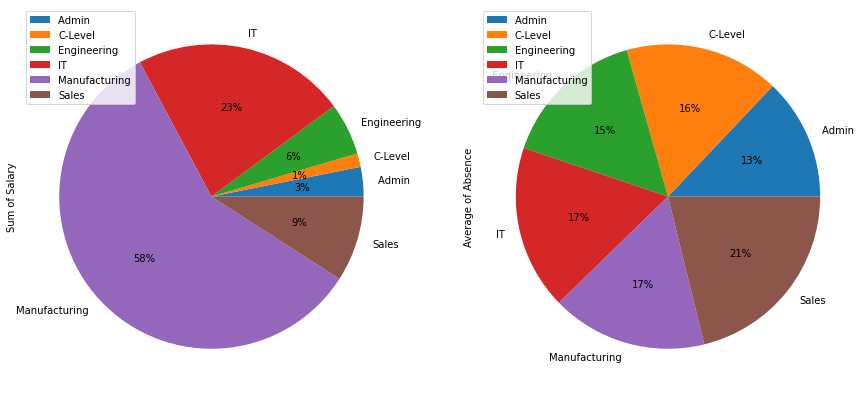

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

#Question 1(b)
df = pd.read_csv('TMA_Data.csv') #read data

#calculate total salary and avg satisfaction
T_Salary = df.groupby("Unit")['Salary'].sum().reset_index()
Avg_Absence = df.groupby("Unit")['Absence'].mean().reset_index()

#convert the DataFrame to a NumPy array
Salary = T_Salary.loc[:,'Salary'].to_numpy()
Absence = Avg_Absence.loc[:,'Absence'].to_numpy()
Unit = T_Salary.loc[:,'Unit'].tolist()

df = pd.DataFrame({'Sum of Salary': Salary, 'Average of Absence': Absence}, index = (Unit))
plot = df.plot.pie(subplots=True, figsize=(15, 15),autopct='%.0f%%')

In [2]:
#Question 1(c)
df = pd.read_csv('TMA_Data.csv')
df.fillna(value=pd.to_datetime('2022-05-01'), inplace=True)

df[['JoinDate','LeftDate']] = df[['JoinDate','LeftDate']].apply(pd.to_datetime)
df['ServiceLength'] = (df['LeftDate'] - df['JoinDate']).dt.days  #days

df['ServiceLength'] = round((df['ServiceLength'] / 365),1) #convert to years, 1 decimal place

#compute min 
DateDiff = df['ServiceLength']
print (min(DateDiff))

#compute max 
DateDiff = df['ServiceLength']
print (max(DateDiff))

#compute avg
DateDiff = round(np.mean(df['ServiceLength'], axis=0),1)
print (DateDiff)

0.1
16.3
6.8


In [4]:
#Question 1(d)
df = pd.read_csv('TMA_Data.csv')
valid_input = False

while valid_input == False:
    fullname = str(input("Please enter staff's full name or enter quit to exit:"))
    if fullname == "quit":
        break
    else:
        staff = df[df['Staff'] == fullname]
        if staff.empty:
            print ("This person is not an employee of this company")
        else:
            display(staff)
            if staff.isnull().values.any() == True:
                print ('This staff still employs in '+ staff['Unit'].to_string(index=False))
            else:
                print ('This staff has left the company on '+ staff['LeftDate'].to_string(index=False))

Please enter staff's full name or enter quit to exit:Anish Hoover


,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
17,18,Anish Hoover,1/7/1988,M,Divorced,Citizen,No,1/5/2015,NaN,IT,50178,Meet,5.0,5,16


This staff still employs in IT
Please enter staff's full name or enter quit to exit:Antonina Needham


,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
20,21,Antonina Needham,09/22/89,F,Single,Citizen,No,2/16/2015,NaN,Sales,61555,Meet,4.5,5,20


This staff still employs in Sales
Please enter staff's full name or enter quit to exit:Antonina
This person is not an employee of this company
Please enter staff's full name or enter quit to exit:antonina needham
This person is not an employee of this company
Please enter staff's full name or enter quit to exit:
This person is not an employee of this company
Please enter staff's full name or enter quit to exit:quit
